# Linear regression IX

## Polynomial regression III

This is continuation of lecture [Polynomial model implementation](http://localhost:8888/notebooks/machine_learning/__linear_regression/__linear_regession_VI.ipynb) and [Metrics: RMSE, MAE, MSE, MAPE, MPE overview](http://localhost:8888/notebooks/machine_learning/__linear_regression/__linear_regression_VIII.ipynb)


In [66]:
%matplotlib inline
#%matplotlib notebook
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [67]:
def generate_set(size):
    return 6 * np.random.rand(size, 1) - 2

In [68]:
m = 50
x = generate_set(m)

In [70]:
noise =  np.random.randn(m, 1)

In [71]:
theta = [0.7, 2]

<code>**1, q, b, q^2, qb, b^2**</code>

In [72]:
# 1, q, b, q^2, qb, b^2
y = theta[0]*x**2 - theta[1]*x + 3 + noise 

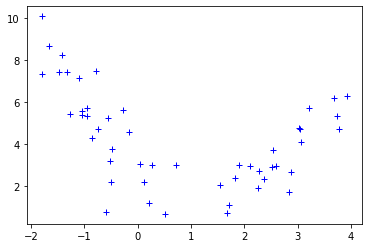

In [73]:
plt.plot(x, y, 'b+')
plt.show()

LinearRegression model method <code>**[fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit)**</code> and <code>**[predict()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict)**</code>

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
m = LinearRegression()
m.fit(x, y)

LinearRegression()

In [78]:
y_preds = m.predict(x)

RMSE: 2.037
R2:   0.162


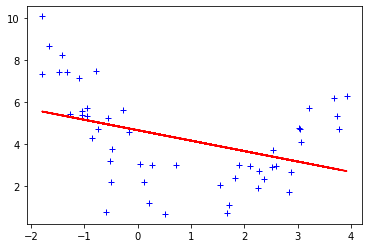

In [81]:
print(
    f'RMSE: {np.sqrt(mean_squared_error(y, y_preds)):.3f}\n' 
    f'R2:   {r2_score(y, y_preds):.3f}'
)

plt.plot(x, y, 'b+')
plt.plot(x, y_preds, 'r-')
plt.show()

Lets discuss and implement 
<code>**[PolynomialFeatures()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)**</code> method and 
<code>**[fit_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform)**</code> method 

PlynomialFeatures method will generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 

In [83]:
x[10]

array([0.50856909])

In [84]:
A = np.array([
    [2, 4]
])

In [92]:
poly = PolynomialFeatures()

In [93]:
B = poly.fit_transform(A)

print(f'features we provide: {A} \n')
print(f'features that we get: {B}')

features we provide: [[2 4]] 

features that we get: [[ 1.  2.  4.  4.  8. 16.]]


features <code>**[q, b]**</code> of the 2° polynomial features are going to be <code>**[1, q, b, q^2, qb, b^2]**</code>

In [97]:
poly = PolynomialFeatures(degree=4, interaction_only=True)
C = poly.fit_transform(A)
print(C)

[[1. 2. 4. 8.]]


<code>**interaction_only**</code> thats a topic for <code>**Feature Interaction**</code>.<br>
If a model makes a prediction based on 2 features, we can decompose the prediction into 4 terms:

 - a constant term, 
 - a term for the first feature, 
 - a term for the second feature and
 - a term for the interaction between the two features.
 
The interaction between two features is the change in the prediction that occurs by varying the features after considering the individual feature effects.

<code>**include_bias**</code> thats our extra column that corresponds for extra feature x_0 that always take value of 1, recap from lecture [__linear_regession_V - Computing parameters analytically](http://localhost:8888/notebooks/machine_learning/__linear_regression/__linear_regession_V.ipynb)

All polynomial powers are zero and that is equal to 1

In [96]:
poly = PolynomialFeatures(interaction_only=True, include_bias=True)
poly.fit_transform(A)

array([[1., 2., 4., 8.]])

Some of the attributes we are provided with

In [98]:
poly = PolynomialFeatures()
poly.fit_transform(A)

# print(f'{poly.powers_}\n')
print(f'no of features we gave: {poly.n_input_features_}\n')
print(f'how many features returned: {poly.n_output_features_}')

no of features we gave: 2

how many features returned: 6


In [99]:
x_polynomial = PolynomialFeatures().fit_transform(x)
print(
    f'polynomials sample:\n {x_polynomial[10]}\n' 
    f'features sample:\n {x[10]}\n'
)

polynomials sample:
 [1.         0.50856909 0.25864252]
features sample:
 [0.50856909]



RMSE: 1.106
R2:   0.753


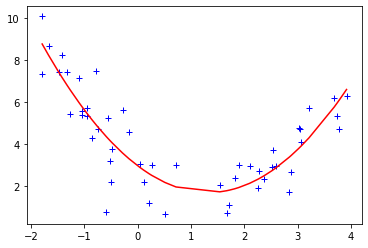

In [100]:
model = LinearRegression()
model.fit(x_polynomial, y)
    
y_predictions = model.predict(x_polynomial)

print(
    f'RMSE: {np.sqrt(mean_squared_error(y, y_predictions)):.3f}\n' 
    f'R2:   {r2_score(y, y_predictions):.3f}'
)

plt.plot(x, y, 'b+')
plt.plot(sorted(x[:, 0]), y_predictions[np.argsort(x[:, 0])], 'r')
plt.show()

The performance boost is evident in both the performance metrics – <code>**RMSE**</code> has decreased and <code>**R2**</code> score has increased.<br>

SM:<br>
<code>**RMSE: 2.101**</code><br>
<code>**R2:   0.223**</code>
---------------
PM:<br>
<code>**RMSE: 0.916**</code><br>
<code>**R2:   0.852**</code>

The same thing is evident in the plot. Let’s take a few higher degree of polynomial features    2, 4, 8, 16, 32

Degree: 2
RMSE:   1.106
R2:     0.753
-------------
Degree: 4
RMSE:   1.089
R2:     0.760
-------------
Degree: 8
RMSE:   1.083
R2:     0.763
-------------
Degree: 16
RMSE:   0.957
R2:     0.815
-------------
Degree: 32
RMSE:   1.543
R2:     0.519
-------------


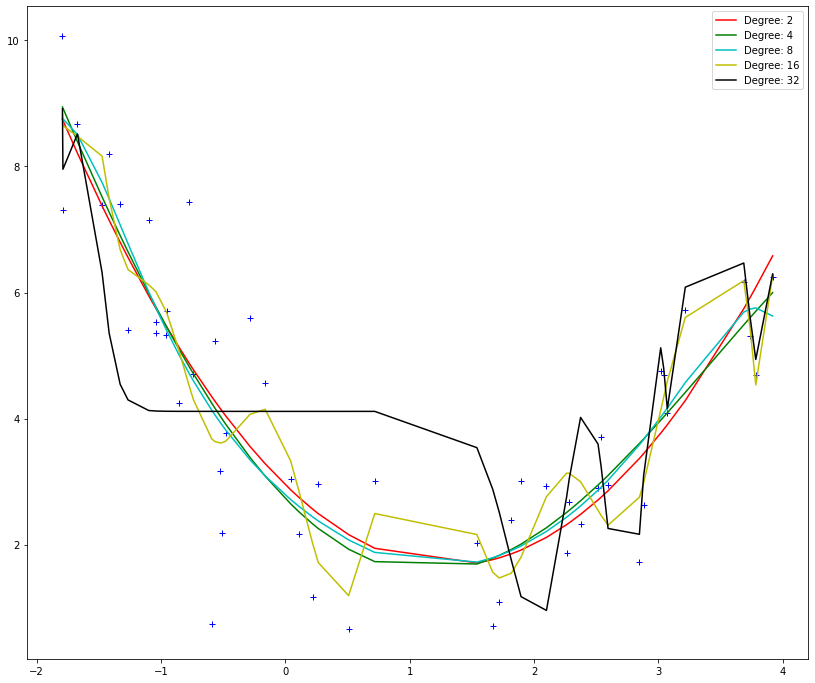

In [108]:
#%matplotlib notebook
def get_preds(x, y, degree):
    poly_feats = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_feats.fit_transform(x)
    lr = LinearRegression()
    lr.fit(x_poly, y)
    return lr.predict(x_poly)

degrees = [2,   4,   8,   16,   32]
colors      = ['r', 'g', 'c', 'y', 'k']

plt.figure(figsize=(14, 12))
plt.plot(x, y, 'b+',)

for degree, c in zip(degrees, colors):
    y_preds = get_preds(x, y, degree)
   
    plt.plot(
        sorted(x[:, 0]), 
        y_preds[np.argsort(x[:, 0])],
        c, 
        label='Degree: {}'.format(degree)
    )
    
    print(
    f'Degree: {degree}\n' 
    f'RMSE:   {np.sqrt(mean_squared_error(y, y_preds)):.3f}\n' 
    f'R2:     {r2_score(y, y_preds):.3f}'
    '\n''-------------'
)
    
plt.legend()
plt.show()

Our model complexity was increased by the degree of polynomial features. We went from a bad model of degree 1, which has high bias <code>**underfits**</code>, to quite good model (degree 2) and then to another bad models (degree 16 or 32), which has high variance <code>**overfits**</code>. Thus we hurt performance and we need to make sure that with increased complexity we stays on sane levels of performance<br>

To get good generalization capabilities that perform well on unseen data we will work with learning curves to peek into performance metrics.

We can utilitze <code>**[sklearn pipeline module](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)**</code> for <code>**PolynomialFeatures and LinearRegression**</code> to group them into one single entity and perform in conjunction to each other

In [55]:
from sklearn.pipeline import Pipeline

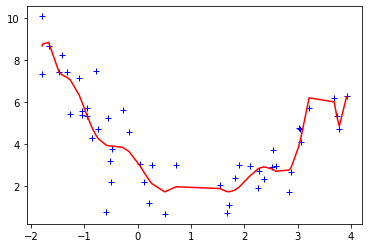

In [114]:
model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=14, include_bias=False)),
    ('lr', LinearRegression())
])

model.fit(x, y)
y_pred = model.predict(x)

plt.plot(x, y, 'b+', )
plt.plot(sorted(x[:, 0]), y_pred[np.argsort(x[:, 0])], 'r')
plt.show()

## Metrics and learning curves

Training and testing(a.k.a validation) loss

In [110]:
x.size

50

In [111]:
x.shape

(50, 1)

In [112]:
from sklearn.metrics import mean_squared_error

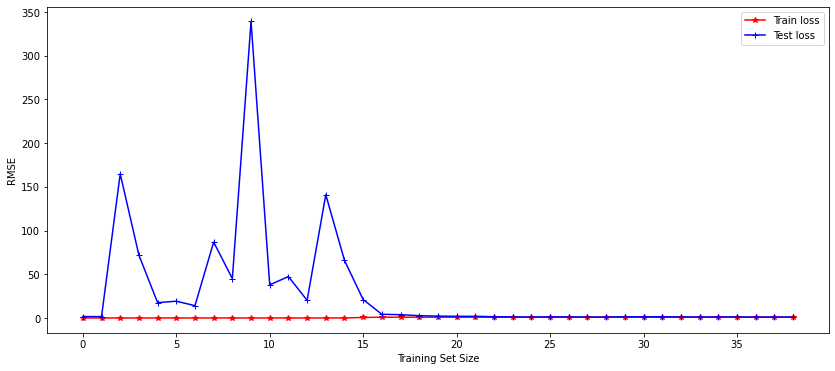

In [115]:
#%matplotlib notebook
%matplotlib inline
def plot_lcs(model, X, Y, split=0.2, metrics=mean_squared_error):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=split)
    
    # collections of errors:
    train_time_loss, test_time_loss = [], []
    
    # iterating over train size:
    for train_size in range(1, len(x_train)):
        # training
        model.fit(x_train[:train_size], y_train[:train_size])
        
        # train and val predictions
        train_preds = model.predict(x_train[:train_size])
        test_preds = model.predict(x_test)
        
        # metrics calculation
        train_time_loss.append(np.sqrt(metrics(y_train[:train_size], train_preds)))
        test_time_loss.append(np.sqrt((metrics(y_test, test_preds))))
        
    # plotting curves
    plt.plot(np.sqrt(train_time_loss), 'r-*', label='Train loss')
    plt.plot(np.sqrt(test_time_loss), 'b-+', label='Test loss')
    plt.ylabel('RMSE')
    plt.xlabel('Training Set Size')

plt.figure(figsize=(14, 6))
plot_lcs(model, x, y)
plt.legend()
plt.show()

Trying it with a model having polynomial features of degree 12 and lets see results.

Gap between <code>**testing loss**</code> curve and the <code>**training loss**</code> curve has increased. Along with this, its noticible that the loss for training set is much more lower than the test(a.k.a validation) set. These two generally are the symptoms of a high variance problem. It  displays that the model is <code>**overfitting the training data**</code> thereby performing poorly on new unseen data.

The main take away question is :
* 1 ) Are  there features in higher degree polynomials that are better describing our predictions than the features used in lower degree polynomials? 

* 2 ) And is there a way to regularize the overfitting aspect of a higher degree polynomial regression? 

## Regularization 

We went quite far and we really made our models complex, to complex in certain cases. And this led us to an issue where complexity made the model overfit the training data we will deal with that in the topic of [Regularization](./__X_Regularization.ipynb)